In [22]:
# He Initialization:
# ------------------
# The 'he_normal' (or 'he_uniform') initializer is designed for layers
# using ReLU or its variants (LeakyReLU, ELU, etc.).
#
# It draws weights from a distribution with variance scaled by 2 / fan_in,
# where fan_in is the number of input units. This scaling keeps the variance
# of activations consistent through layers when using ReLU-based activations.
#
# Why it's good:
# - Prevents vanishing gradients that often occur with deep ReLU networks.
# - Maintains healthy signal propagation even in very deep architectures.
# - Leads to faster and more reliable convergence than random or Xavier initialization
#   when ReLU is used.
#
# In short, 'he_normal' gives ReLU networks a strong and stable start for training.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


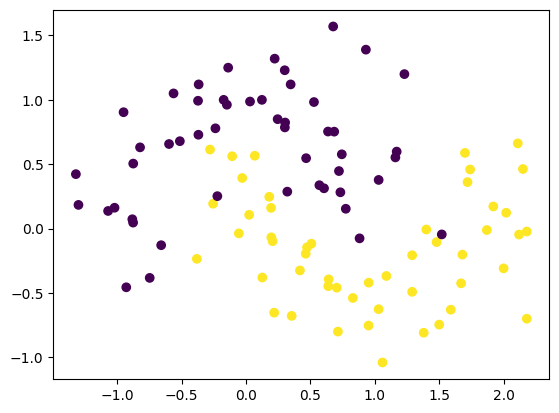

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.5234 - loss: 0.7226 - val_accuracy: 0.5000 - val_loss: 0.7125
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4688 - loss: 0.7295 - val_accuracy: 0.5000 - val_loss: 0.7022
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6924
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4766 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.6826
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4414 - loss: 0.6966 - val_accuracy: 0.5000 - val_loss: 0.6733
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5430 - loss: 0.6588 - val_accuracy: 0.5000 - val_loss: 0.6646
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4961 - loss: 0.6688 - val_accuracy: 0.4500 - val_loss: 0.6561
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5156 - loss: 0.6516 - val_accuracy: 0.4500 - val_loss

In [13]:
model.get_weights()

[array([[-0.66387314,  0.4435036 ,  1.6284913 ,  0.7780204 ,  1.9616851 ,
          0.2993264 ,  1.8134038 ,  0.40072918,  1.4949869 ,  2.2686267 ],
        [-0.08308782, -1.098385  ,  1.6818726 , -0.1333581 , -0.2754686 ,
         -1.7109722 ,  0.77863663,  0.86592054, -0.44693387, -2.0432274 ]],
       dtype=float32),
 array([-0.08872566,  0.12140231, -0.06468013,  0.13584761,  0.15103745,
         0.08842261, -0.13235006, -0.00973112, -0.09791603,  0.15714057],
       dtype=float32),
 array([[ 0.46230304, -0.07541671, -0.18613242, -0.46046823, -0.6090842 ,
          0.00483347,  0.07333415,  0.18645489, -0.9112431 ,  0.1156046 ],
        [-0.15612856,  0.80756575,  0.08893286,  0.42328298,  0.35623667,
         -0.7886988 ,  0.178264  ,  0.39075407,  0.10139629,  0.4201792 ],
        [ 0.11455901, -0.54409885, -0.2271105 ,  0.03708291, -0.36228475,
          0.32654473,  0.06034615, -0.23636937, -0.40420422, -0.6013086 ],
        [ 0.53577054,  0.21817037, -0.40560347, -0.26572376, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


<Axes: >

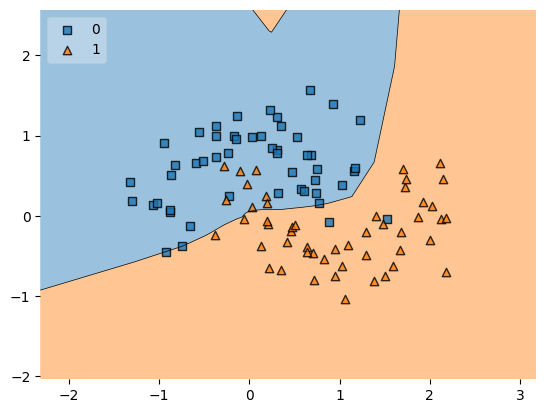

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [15]:
##xavier/glorat intitalization

In [23]:
# Glorot (Xavier) Normal Initialization:
# --------------------------------------
# The 'glorot_normal' initializer, also known as Xavier initialization,
# is designed to keep the variance of activations and gradients consistent
# across all layers during forward and backward propagation.
#
# It draws weights from a normal distribution with mean 0 and a specific variance
# that depends on both the number of input and output units in a layer.
#
# Why it's good:
# - Prevents gradients from vanishing or exploding in deep networks.
# - Ensures stable signal flow across layers, helping faster and smoother convergence.
# - Works particularly well with 'tanh' and 'sigmoid' activations.
#
# In short, 'glorot_normal' gives a balanced start for the network to learn efficiently.


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model1 = Sequential()

# Add layers
model1.add(Dense(10, activation='tanh', input_dim=2, kernel_initializer='glorot_normal'))
model1.add(Dense(10, activation='tanh', kernel_initializer='glorot_normal'))
model1.add(Dense(10, activation='tanh', kernel_initializer='glorot_normal'))
model1.add(Dense(10, activation='tanh', kernel_initializer='glorot_normal'))
model1.add(Dense(1, activation='sigmoid'))

# Display summary
model1.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model1.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.2180 - loss: 0.7926 - val_accuracy: 0.1500 - val_loss: 0.7919
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2516 - loss: 0.7599 - val_accuracy: 0.1500 - val_loss: 0.7649
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2703 - loss: 0.7413 - val_accuracy: 0.3000 - val_loss: 0.7398
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3781 - loss: 0.7180 - val_accuracy: 0.3500 - val_loss: 0.7167
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6227 - loss: 0.6970 - val_accuracy: 0.6000 - val_loss: 0.6956
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6914 - loss: 0.6800 - val_accuracy: 0.7000 - val_loss: 0.6764
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7000 - loss: 0.6626 - val_accuracy: 0.8000 - val_loss: 0.6582
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.7328 - loss: 0.6408 - val_accuracy: 0.8000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step


<Axes: >

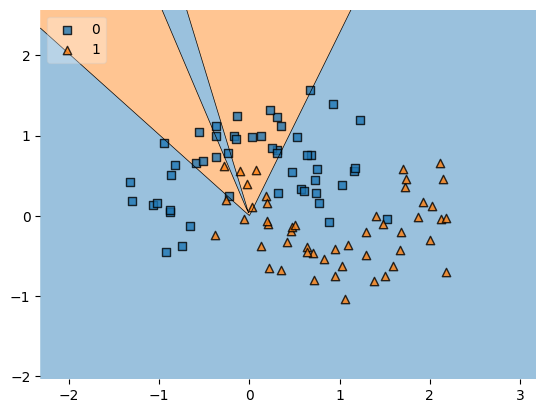

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)